# Classify images according to isCancerous
In this notebook the goal is to classify the images according to their isCancerous state (0 or 1)

# Setup
1. Import libraries
2. Setting up data sets
3. Initialize learning curve function

We will also concatenate data_labels_mainData.csv and data_labels_extraData.csv together for this model as both contains data for the column isCancerous.

In [1]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

import pandas as pd

tf.__version__

'2.5.0'

In [2]:
from sklearn.model_selection import train_test_split


data1 = pd.read_csv('./data_labels_mainData.csv')
data2 = pd.read_csv('./data_labels_extraData.csv')

data1.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0


In [3]:
data2.head()

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0


In [4]:
data1_edited = data1.drop(columns=['cellTypeName', 'cellType'])

In [5]:
concatenated_dataframe = pd.concat([data1_edited, data2])

In [6]:
print(data1.shape)
print(data2.shape)
print(concatenated_dataframe.shape)

(9896, 6)
(10384, 4)
(20280, 4)


In [10]:
data = concatenated_dataframe
train_data_big, test_data_big = train_test_split(concatenated_dataframe, test_size=0.2, random_state=42)
train_data_big, val_data_big = train_test_split(train_data_big, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data_big.shape[0], val_data_big.shape[0], test_data_big.shape[0]))

Train data : 12168, Val Data: 4056, Test Data: 4056


In [11]:
from sklearn.model_selection import train_test_split

_, train_data = train_test_split(train_data_big, test_size=0.3, random_state=42)
_, test_data = train_test_split(test_data_big, test_size=0.3, random_state=42)
_, val_data = train_test_split(val_data_big, test_size=0.3, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 3651, Val Data: 1217, Test Data: 1217


# EDA

In [12]:
data1.cellTypeName.unique()

array(['fibroblast', 'inflammatory', 'others', 'epithelial'], dtype=object)

Since there is 4 cell type and 2 isCancerous type, the number of label that one model has to predict is 8. It is better to have 4 models and each model handling 1 cell type and 2 isCancerous type and predict 2 label than having one model predict 8. 

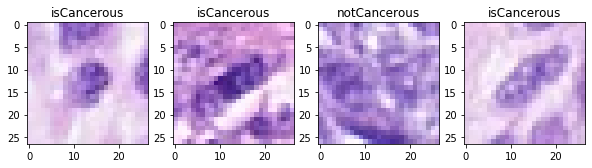

In [13]:
from PIL import Image

label_names = {'isCancerous' : 0, 'notCancerous' : 1}
d_inv = {v: k for k, v in label_names.items()}

img_list = list('./patch_images/'+train_data['ImageName'])
target = train_data['isCancerous']
target_list = list(target)

fig = plt.figure(figsize=[10,10])

for i in np.arange(4):
    plt.subplot(1, 4, i+1)
    img = Image.open(img_list[i])
    
    plt.imshow(img)
    plt.title(d_inv[int(target_list[i])])

In [14]:
# check image size
img = Image.open(img_list[10])
img_numpy = np.ascontiguousarray(img, dtype=np.float32)
print('Image size \nH:{} W:{} C:{}'.format(img_numpy.shape[0], img_numpy.shape[1], img_numpy.shape[2]))

Image size 
H:27 W:27 C:3


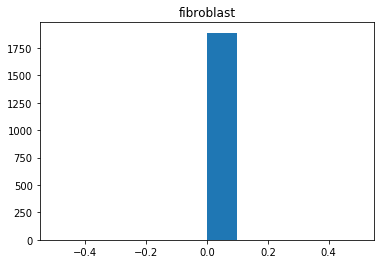

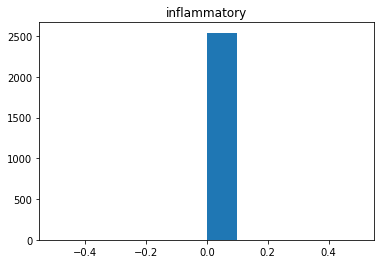

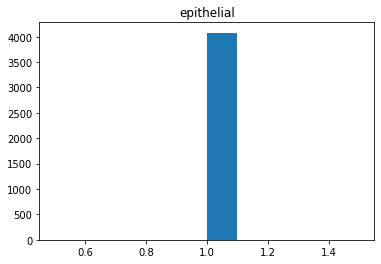

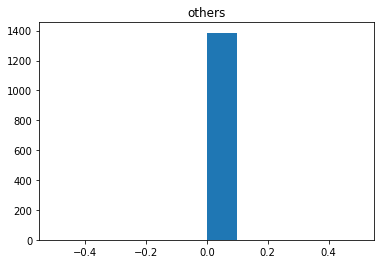

In [15]:
fibroblast = data1[data1['cellType']==0]
inflammatory = data1[data1['cellType']==1]
epithelial = data1[data1['cellType']==2]
others = data1[data1['cellType']==3]


plt.hist(fibroblast['isCancerous'])
plt.title('fibroblast')
plt.show()

plt.hist(inflammatory['isCancerous'])
plt.title('inflammatory')
plt.show()

plt.hist(epithelial['isCancerous'])
plt.title('epithelial')
plt.show()

plt.hist(others['isCancerous'])
plt.title('others')
plt.show()

Observation: An interesting revalation occur, apparently cell type fibroblast, inflammatory and other does not have isCancerous lable while cell type epithelial does not have notCancerous label. 

From the observation above, it would not be smart to have 4 models handling each type of cell. Sorry if this contracdict with what I said above but I tried to avoid a "Zero Frequency Probem"

## Further setups

In [16]:
# learning curve function
import matplotlib.pyplot as plt
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()
    
# cellType needs to be string
train_data['isCancerous'] = train_data['isCancerous'].astype('str')
val_data['isCancerous'] = val_data['isCancerous'].astype('str')

C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [59]:
# initializing data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 3651 validated image filenames belonging to 2 classes.
Found 1217 validated image filenames belonging to 2 classes.
Found 1217 validated image filenames belonging to 2 classes.


# Performace evaluation tool

In [ ]:
def PredictModel(model):
    batch_size_ = 1
    y_pred = list()
    y_test = list()
    filenames = test_generator.filenames
    N_images = len(filenames)
    batches = 0

    # iterate through the data generator and predict for each batch
    # hold the predictions and labels
    for x,y in test_generator:
            yp = model.predict(x, verbose=0)
            yp = np.argmax(yp, axis = 1)
            yt = np.argmax(y, axis = 1)
            y_pred = y_pred + yp.tolist()
            y_test = y_test + yt.tolist()

            batches += 1
            if batches >= N_images / batch_size_:
                break
                
    return (y_test, y_pred)

# 1) NN model as Base model
We will use a simple NN model using Keras Sequential for our base model

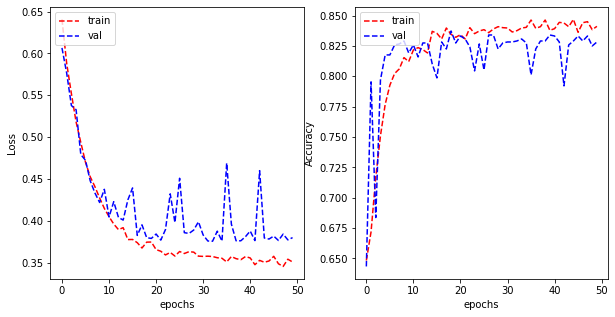

In [18]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 2

model_cancer = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

model_cancer.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

history = model_cancer.fit(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

## Parameters Tuning for base model
### Regularization
Tuning the lambda value for l2 regulurization

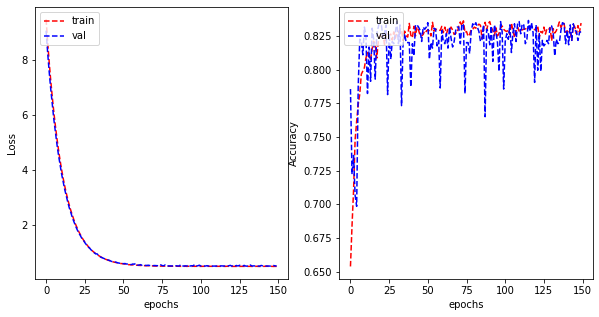

In [19]:
reg_lambda = 0.02

model_cancer_reg = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dense(OUTPUT_CLASSES, kernel_regularizer=tf.keras.regularizers.l2(reg_lambda))
])

model_cancer_reg.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

history_cancer_reg = model_cancer_reg.fit(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

plot_learning_curve(history_cancer_reg.history['loss'], history_cancer_reg.history['val_loss'], 
                    history_cancer_reg.history['categorical_accuracy'], history_cancer_reg.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

### Drop out
Next we try to add a dropout layer to regularize the model

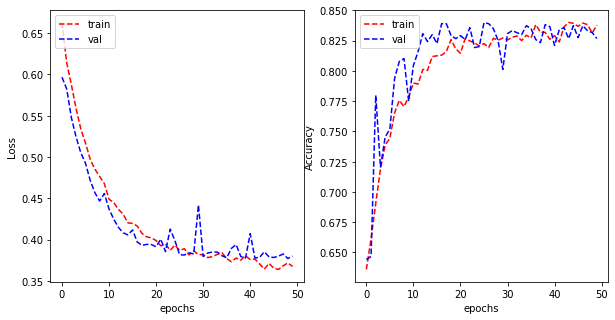

In [21]:
model_cancer_drop = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

model_cancer_drop.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

history_cancer_drop = model_cancer_drop.fit(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

plot_learning_curve(history_cancer_drop.history['loss'], history_cancer_drop.history['val_loss'], 
                    history_cancer_drop.history['categorical_accuracy'], history_cancer_drop.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

## Cross validation to train the model

In [26]:
from sklearn.model_selection import KFold, StratifiedKFold

Y = train_data[['isCancerous']]
kf = KFold(n_splits = 5)
Y

,isCancerous
6301,0
8117,0
1804,1
6017,0
8430,0
...,...
1283,1
4912,0
2612,1
4436,0


In [27]:
idg = ImageDataGenerator(rescale=1./255, data_format='channels_last')

def get_model_name(k):
    return 'model_'+str(k)+'.h5'

VALIDATION_ACCURACY = []
VALIDATION_LOSS = []

save_dir = '/cancer_CV/'
fold_var = 1
reg_lambda = 0.02

for train_index, val_index in kf.split(Y):
    training_data = train_data.iloc[train_index]
    validation_data = train_data.iloc[val_index]
    
    train_datagen = idg.flow_from_dataframe(dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')
    valid_datagen  = idg.flow_from_dataframe(dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')
       


    # CREATE NEW MODEL
    model_cancer_CV = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dense(OUTPUT_CLASSES, kernel_regularizer=tf.keras.regularizers.l2(reg_lambda))
])
    # COMPILE NEW MODEL
    model_cancer_CV.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])


    # CREATE CALLBACKS
    checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+get_model_name(fold_var), 
                                                    monitor='val_accuracy', verbose=1, 
                                                    save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    # There can be other callbacks, but just showing one because it involves the model name
    # This saves the best model
    # FIT THE MODEL
    history_CV = model_cancer_CV.fit(train_datagen,
                epochs=50,
                callbacks=callbacks_list,
                validation_data= valid_datagen,
                verbose=1)
    #PLOT HISTORY
    #       :
    #       :

    # LOAD BEST MODEL to evaluate the performance of the model
   
    model_cancer_CV.load_weights("/cancer_CV/model_"+str(fold_var)+".h5")

    results = model_cancer_CV.evaluate(valid_datagen)
    results = dict(zip(model_cancer_CV.metrics_names,results))

    VALIDATION_ACCURACY.append(results['categorical_accuracy'])
    VALIDATION_LOSS.append(results['loss'])

    tf.keras.backend.clear_session()

    fold_var += 1



Found 3651 validated image filenames belonging to 2 classes.
Found 1217 validated image filenames belonging to 2 classes.
Epoch 1/50
115/115 [==============================] - 2s 17ms/step - loss: 9.4541 - categorical_accuracy: 0.6595 - val_loss: 9.0336 - val_categorical_accuracy: 0.6434
Epoch 2/50
115/115 [==============================] - 2s 16ms/step - loss: 8.6293 - categorical_accuracy: 0.6921 - val_loss: 8.2539 - val_categorical_accuracy: 0.6639
Epoch 3/50
115/115 [==============================] - 2s 16ms/step - loss: 7.9055 - categorical_accuracy: 0.7143 - val_loss: 7.5565 - val_categorical_accuracy: 0.7173
Epoch 4/50
115/115 [==============================] - 2s 16ms/step - loss: 7.2437 - categorical_accuracy: 0.7382 - val_loss: 6.9299 - val_categorical_accuracy: 0.7288
Epoch 5/50
115/115 [==============================] - 2s 16ms/step - loss: 6.6478 - categorical_accuracy: 0.7508 - val_loss: 6.3581 - val_categorical_accuracy: 0.7938
Epoch 6/50
115/115 [=======================

115/115 [==============================] - 2s 16ms/step - loss: 0.9707 - categorical_accuracy: 0.8274 - val_loss: 0.9705 - val_categorical_accuracy: 0.8274
Epoch 34/50
115/115 [==============================] - 2s 16ms/step - loss: 0.9326 - categorical_accuracy: 0.8255 - val_loss: 0.9284 - val_categorical_accuracy: 0.8299
Epoch 35/50
115/115 [==============================] - 2s 16ms/step - loss: 0.8939 - categorical_accuracy: 0.8299 - val_loss: 0.9009 - val_categorical_accuracy: 0.8242
Epoch 36/50
115/115 [==============================] - 2s 16ms/step - loss: 0.8619 - categorical_accuracy: 0.8310 - val_loss: 0.8575 - val_categorical_accuracy: 0.8192
Epoch 37/50
115/115 [==============================] - 2s 16ms/step - loss: 0.8243 - categorical_accuracy: 0.8357 - val_loss: 0.8215 - val_categorical_accuracy: 0.8332
Epoch 38/50
115/115 [==============================] - 2s 16ms/step - loss: 0.8003 - categorical_accuracy: 0.8354 - val_loss: 0.7951 - val_categorical_accuracy: 0.8266
Epoc

Epoch 15/50
115/115 [==============================] - 2s 16ms/step - loss: 2.9417 - categorical_accuracy: 0.8165 - val_loss: 2.8453 - val_categorical_accuracy: 0.7913
Epoch 16/50
115/115 [==============================] - 2s 16ms/step - loss: 2.7281 - categorical_accuracy: 0.8165 - val_loss: 2.6328 - val_categorical_accuracy: 0.8168
Epoch 17/50
115/115 [==============================] - 2s 16ms/step - loss: 2.5297 - categorical_accuracy: 0.8190 - val_loss: 2.4829 - val_categorical_accuracy: 0.7502
Epoch 18/50
115/115 [==============================] - 2s 16ms/step - loss: 2.3543 - categorical_accuracy: 0.8209 - val_loss: 2.2730 - val_categorical_accuracy: 0.8200
Epoch 19/50
115/115 [==============================] - 2s 16ms/step - loss: 2.1901 - categorical_accuracy: 0.8222 - val_loss: 2.1338 - val_categorical_accuracy: 0.8242
Epoch 20/50
115/115 [==============================] - 2s 16ms/step - loss: 2.0408 - categorical_accuracy: 0.8228 - val_loss: 1.9835 - val_categorical_accuracy:

Epoch 48/50
115/115 [==============================] - 2s 16ms/step - loss: 0.6270 - categorical_accuracy: 0.8239 - val_loss: 0.6419 - val_categorical_accuracy: 0.8274
Epoch 49/50
115/115 [==============================] - 2s 16ms/step - loss: 0.6229 - categorical_accuracy: 0.8258 - val_loss: 0.6184 - val_categorical_accuracy: 0.8283
Epoch 50/50
39/39 [==============================] - 0s 11ms/step - loss: 10.0562 - categorical_accuracy: 0.7872
Found 3651 validated image filenames belonging to 2 classes.
Found 1217 validated image filenames belonging to 2 classes.
Epoch 1/50
115/115 [==============================] - 2s 17ms/step - loss: 9.4573 - categorical_accuracy: 0.6464 - val_loss: 9.0267 - val_categorical_accuracy: 0.6582
Epoch 2/50
115/115 [==============================] - 2s 16ms/step - loss: 8.6470 - categorical_accuracy: 0.6883 - val_loss: 8.2615 - val_categorical_accuracy: 0.6795
Epoch 3/50
115/115 [==============================] - 2s 16ms/step - loss: 7.9193 - categorical

Epoch 30/50
115/115 [==============================] - 2s 16ms/step - loss: 1.1208 - categorical_accuracy: 0.8253 - val_loss: 1.0977 - val_categorical_accuracy: 0.8307
Epoch 31/50
115/115 [==============================] - 2s 16ms/step - loss: 1.0652 - categorical_accuracy: 0.8280 - val_loss: 1.0633 - val_categorical_accuracy: 0.8053
Epoch 32/50
115/115 [==============================] - 2s 16ms/step - loss: 1.0131 - categorical_accuracy: 0.8253 - val_loss: 1.0000 - val_categorical_accuracy: 0.8324
Epoch 33/50
115/115 [==============================] - 2s 16ms/step - loss: 0.9689 - categorical_accuracy: 0.8266 - val_loss: 0.9657 - val_categorical_accuracy: 0.8192
Epoch 34/50
115/115 [==============================] - 2s 16ms/step - loss: 0.9283 - categorical_accuracy: 0.8263 - val_loss: 0.9269 - val_categorical_accuracy: 0.8324
Epoch 35/50
115/115 [==============================] - 2s 16ms/step - loss: 0.8943 - categorical_accuracy: 0.8285 - val_loss: 0.8871 - val_categorical_accuracy:

Epoch 12/50
115/115 [==============================] - 2s 16ms/step - loss: 3.7194 - categorical_accuracy: 0.8110 - val_loss: 3.5760 - val_categorical_accuracy: 0.8209
Epoch 13/50
115/115 [==============================] - 2s 16ms/step - loss: 3.4376 - categorical_accuracy: 0.8179 - val_loss: 3.3062 - val_categorical_accuracy: 0.8258
Epoch 14/50
115/115 [==============================] - 2s 16ms/step - loss: 3.1781 - categorical_accuracy: 0.8179 - val_loss: 3.0662 - val_categorical_accuracy: 0.8291
Epoch 15/50
115/115 [==============================] - 2s 16ms/step - loss: 2.9406 - categorical_accuracy: 0.8187 - val_loss: 2.8358 - val_categorical_accuracy: 0.8283
Epoch 16/50
115/115 [==============================] - 2s 16ms/step - loss: 2.7297 - categorical_accuracy: 0.8190 - val_loss: 2.6357 - val_categorical_accuracy: 0.8316
Epoch 17/50
115/115 [==============================] - 2s 16ms/step - loss: 2.5357 - categorical_accuracy: 0.8168 - val_loss: 2.4456 - val_categorical_accuracy:

115/115 [==============================] - 2s 16ms/step - loss: 0.6767 - categorical_accuracy: 0.8299 - val_loss: 0.6813 - val_categorical_accuracy: 0.8348
Epoch 45/50
115/115 [==============================] - 2s 16ms/step - loss: 0.6612 - categorical_accuracy: 0.8299 - val_loss: 0.6789 - val_categorical_accuracy: 0.8085
Epoch 46/50
115/115 [==============================] - 2s 16ms/step - loss: 0.6501 - categorical_accuracy: 0.8239 - val_loss: 0.6518 - val_categorical_accuracy: 0.8242
Epoch 47/50
115/115 [==============================] - 2s 16ms/step - loss: 0.6332 - categorical_accuracy: 0.8310 - val_loss: 0.6388 - val_categorical_accuracy: 0.8291
Epoch 48/50
115/115 [==============================] - 2s 16ms/step - loss: 0.6277 - categorical_accuracy: 0.8184 - val_loss: 0.6386 - val_categorical_accuracy: 0.8274
Epoch 49/50
115/115 [==============================] - 2s 16ms/step - loss: 0.6139 - categorical_accuracy: 0.8236 - val_loss: 0.6289 - val_categorical_accuracy: 0.8291
Epoc

Epoch 26/50
115/115 [==============================] - 2s 16ms/step - loss: 1.3888 - categorical_accuracy: 0.8266 - val_loss: 1.3556 - val_categorical_accuracy: 0.8381
Epoch 27/50
115/115 [==============================] - 2s 16ms/step - loss: 1.3104 - categorical_accuracy: 0.8302 - val_loss: 1.2835 - val_categorical_accuracy: 0.8373
Epoch 28/50
115/115 [==============================] - 2s 16ms/step - loss: 1.2420 - categorical_accuracy: 0.8242 - val_loss: 1.2278 - val_categorical_accuracy: 0.8266
Epoch 29/50
115/115 [==============================] - 2s 16ms/step - loss: 1.1752 - categorical_accuracy: 0.8261 - val_loss: 1.1652 - val_categorical_accuracy: 0.8291
Epoch 30/50
115/115 [==============================] - 2s 16ms/step - loss: 1.1199 - categorical_accuracy: 0.8236 - val_loss: 1.1022 - val_categorical_accuracy: 0.8348
Epoch 31/50
115/115 [==============================] - 2s 16ms/step - loss: 1.0659 - categorical_accuracy: 0.8250 - val_loss: 1.0465 - val_categorical_accuracy:

In [28]:
VALIDATION_ACCURACY.sort()
print("Largest element is:", VALIDATION_ACCURACY[-1])

Largest element is: 0.8101890087127686


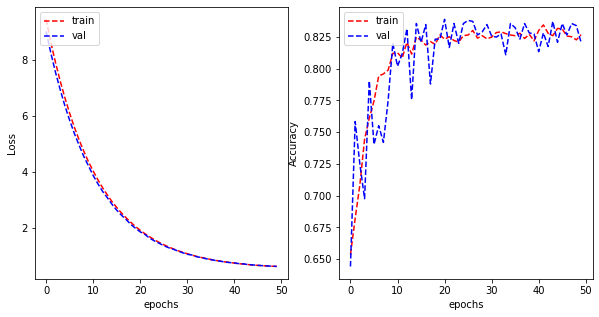

In [29]:
plot_learning_curve(history_CV.history['loss'], history_CV.history['val_loss'], 
                    history_CV.history['categorical_accuracy'], history_CV.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

### Save model

In [30]:
# Original model without tuning
model_cancer.save("cancer_base_model")

# Model with regularization
model_cancer_reg.save("cancer_reg_base_model")

# Model with dropout
model_cancer_drop.save("cancer_dropout_base_model")
model_cancer_CV.save("cancer_CV_model")

INFO:tensorflow:Assets written to: cancer_base_model\assets
INFO:tensorflow:Assets written to: cancer_reg_base_model\assets
INFO:tensorflow:Assets written to: cancer_dropout_base_model\assets
INFO:tensorflow:Assets written to: cancer_CV_model\assets


## Testing the final model
The model tuning by dropout seems to have the best performance.

In [32]:
model_cancer.evaluate(test_generator)

1217/1217 [==============================] - 6s 5ms/step - loss: 0.3484 - categorical_accuracy: 0.8447


[0.34839504957199097, 0.8447000980377197]

In [33]:
model_cancer_reg.evaluate(test_generator)

1217/1217 [==============================] - 2s 2ms/step - loss: 0.4968 - categorical_accuracy: 0.8389


[0.4968474507331848, 0.8389482498168945]

In [34]:
model_cancer_drop.evaluate(test_generator)

1217/1217 [==============================] - 1s 1ms/step - loss: 0.3513 - categorical_accuracy: 0.8480


[0.35127687454223633, 0.8479868769645691]

In [35]:
model_cancer_CV.evaluate(test_generator)

1217/1217 [==============================] - 2s 2ms/step - loss: 9.9109 - categorical_accuracy: 0.8316


[9.910944938659668, 0.8315529823303223]

# 2) CNN model (using leNet)
Next we will experiment using CNN models, in this section we will attempt to create a CNN model using leNet

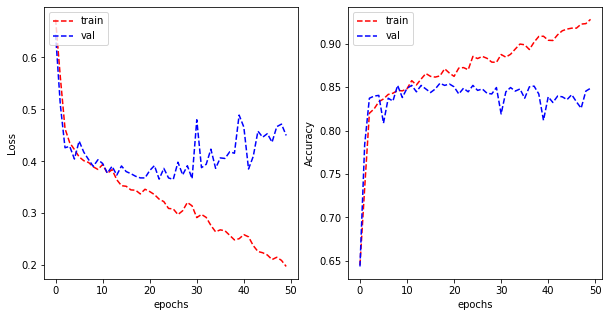

In [36]:
reg_lambda = 0.001
OUTPUT_CLASSES = 2

model_cancer_leNet1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None)),
    
    
    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda))
])

sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_cancer_leNet1.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_cancer_leNet1 = model_cancer_leNet1.fit(train_generator, 
                                    validation_data = validation_generator, 
                                    epochs=50, verbose=0)

plot_learning_curve(history_cancer_leNet1.history['loss'], history_cancer_leNet1.history['val_loss'], 
                    history_cancer_leNet1.history['categorical_accuracy'], history_cancer_leNet1.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

Observation:

### Data augmentation

In [80]:
train_datagen_data_aug = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                  rotation_range=15, width_shift_range=0.2,
                                  height_shift_range=0.2)
train_datagen_data_aug2 = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                  rotation_range=10, width_shift_range=0.4,
                                  height_shift_range=0.4)
train_datagen_data_aug3 = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                  rotation_range=20, width_shift_range=0.6,
                                  height_shift_range=0.6)
train_datagen_data_aug4 = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                  rotation_range=40, width_shift_range=0.6,
                                  height_shift_range=0.6)

batch_size = 32

train_generator_data_aug = train_datagen_data_aug.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical',
        horizontal_flip=True)

train_generator_data_aug2 = train_datagen_data_aug2.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical',
        horizontal_flip=True)

train_generator_data_aug3 = train_datagen_data_aug3.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical',
        horizontal_flip=True)

train_generator_data_aug4 = train_datagen_data_aug4.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical',
        horizontal_flip=True)


Found 3651 validated image filenames belonging to 2 classes.
Found 3651 validated image filenames belonging to 2 classes.
Found 3651 validated image filenames belonging to 2 classes.
Found 3651 validated image filenames belonging to 2 classes.


C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


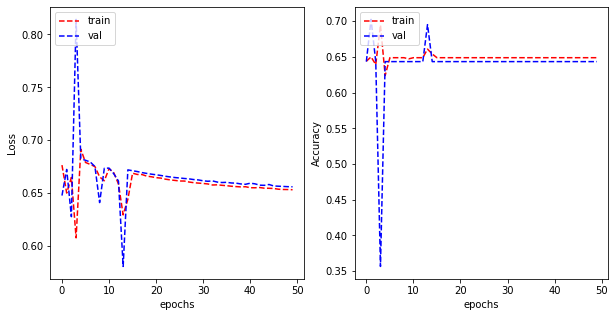

In [53]:
model_cancer_leNet2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None)),
    
    
    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda))
])

model_cancer_leNet2.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_cancer_leNet2 = model_cancer_leNet2.fit_generator(train_generator_data_aug, 
                                    validation_data = validation_generator, 
                                    epochs=50, verbose=0)

plot_learning_curve(history_cancer_leNet2.history['loss'], history_cancer_leNet2.history['val_loss'], 
                    history_cancer_leNet2.history['categorical_accuracy'], history_cancer_leNet2.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

### Attemp 2 

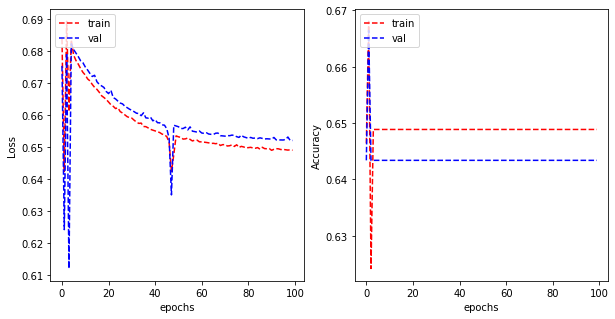

In [57]:
model_cancer_leNet3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None)),
    
    
    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda))
])

model_cancer_leNet3.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_cancer_leNet3 = model_cancer_leNet3.fit_generator(train_generator_data_aug2, 
                                    validation_data = validation_generator, 
                                    epochs=150, verbose=0)

plot_learning_curve(history_cancer_leNet3.history['loss'], history_cancer_leNet3.history['val_loss'], 
                    history_cancer_leNet3.history['categorical_accuracy'], history_cancer_leNet3.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

### Attemp 3

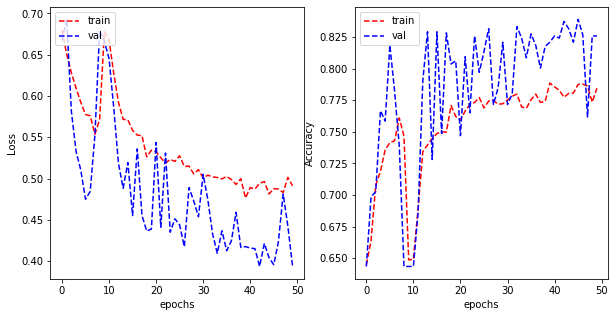

In [60]:
model_cancer_leNet4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None)),
    
    
    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda))
])

model_cancer_leNet4.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_cancer_leNet4 = model_cancer_leNet4.fit_generator(train_generator_data_aug3, 
                                    validation_data = validation_generator, 
                                    epochs=150, verbose=0)

plot_learning_curve(history_cancer_leNet4.history['loss'], history_cancer_leNet4.history['val_loss'], 
                    history_cancer_leNet4.history['categorical_accuracy'], history_cancer_leNet4.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

### Attemp 4

C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


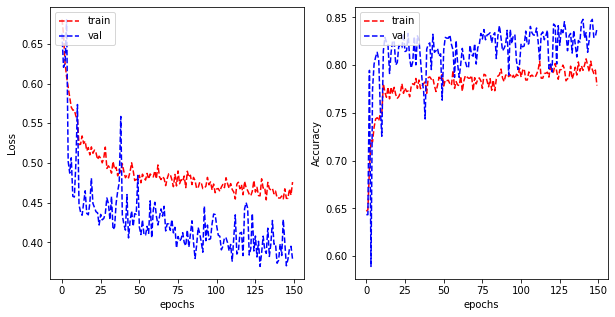

In [81]:
model_cancer_leNet5 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None)),
    
    
    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda))
])

model_cancer_leNet5.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_cancer_leNet5 = model_cancer_leNet5.fit_generator(train_generator_data_aug4, 
                                    validation_data = validation_generator, 
                                    epochs=150, verbose=0)

plot_learning_curve(history_cancer_leNet5.history['loss'], history_cancer_leNet5.history['val_loss'], 
                    history_cancer_leNet5.history['categorical_accuracy'], history_cancer_leNet5.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

Observation:

## Testing the final model

In [85]:
model_cancer_leNet1.evaluate(test_generator)

39/39 [==============================] - 0s 11ms/step - loss: 0.3895 - categorical_accuracy: 0.8726


[0.38952961564064026, 0.8726376295089722]

In [86]:
model_cancer_leNet2.evaluate(test_generator)

39/39 [==============================] - 0s 11ms/step - loss: 0.6529 - categorical_accuracy: 0.6483


[0.6529453992843628, 0.6483155488967896]

In [87]:
model_cancer_leNet3.evaluate(test_generator)

39/39 [==============================] - 0s 11ms/step - loss: 0.6490 - categorical_accuracy: 0.6483


[0.6490487456321716, 0.6483155488967896]

In [88]:
model_cancer_leNet4.evaluate(test_generator)

39/39 [==============================] - 0s 11ms/step - loss: 0.3611 - categorical_accuracy: 0.8546


[0.3611272871494293, 0.854560375213623]

In [89]:
model_cancer_leNet5.evaluate(test_generator)

39/39 [==============================] - 0s 11ms/step - loss: 0.3568 - categorical_accuracy: 0.8628


[0.35675111413002014, 0.8627772927284241]

# 3) CNN model (using VGG)
Next we will experiment using CNN VGG models.

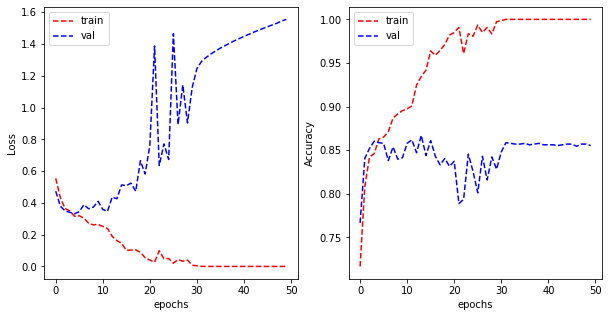

In [68]:
OUTPUT_CLASSES = 2
model_cancer_VGG_1 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

model_cancer_VGG_1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

history_cancer_VGG_1 = model_cancer_VGG_1.fit(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

plot_learning_curve(history_cancer_VGG_1.history['loss'], history_cancer_VGG_1.history['val_loss'], 
                    history_cancer_VGG_1.history['categorical_accuracy'], history_cancer_VGG_1.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

Observation:

### Regularization with data augmentation

In [69]:
train_datagen_data_aug_VGG = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                  rotation_range=15, width_shift_range=0.2,
                                  height_shift_range=0.2)

batch_size = 32

train_generator_data_aug_VGG = train_datagen_data_aug_VGG.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 3651 validated image filenames belonging to 2 classes.


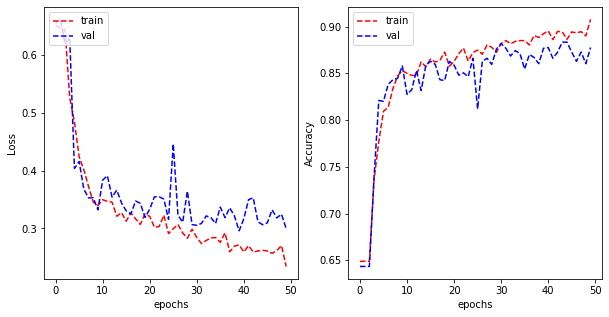

In [70]:
OUTPUT_CLASSES = 2
model_cancer_VGG_2 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

model_cancer_VGG_2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

history_cancer_VGG_2 = model_cancer_VGG_2.fit(train_generator_data_aug_VGG, validation_data = validation_generator, epochs=50, verbose=0)

plot_learning_curve(history_cancer_VGG_2.history['loss'], history_cancer_VGG_2.history['val_loss'], 
                    history_cancer_VGG_2.history['categorical_accuracy'], history_cancer_VGG_2.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

## Adding regularization and dropout

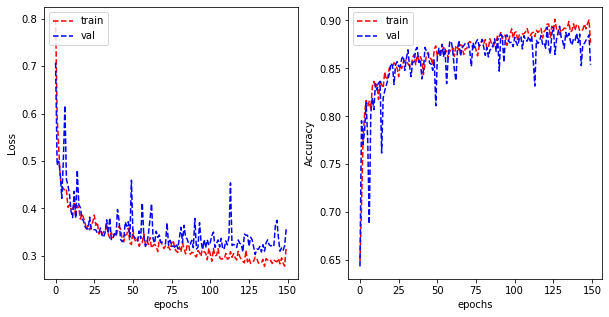

In [79]:
reg_lambda = 0.001
OUTPUT_CLASSES = 2
model_cancer_VGG_3 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

model_cancer_VGG_3.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

history_cancer_VGG_3 = model_cancer_VGG_3.fit(train_generator_data_aug_VGG, validation_data = validation_generator, epochs= 150, verbose=0)

plot_learning_curve(history_cancer_VGG_3.history['loss'], history_cancer_VGG_3.history['val_loss'], 
                    history_cancer_VGG_3.history['categorical_accuracy'], history_cancer_VGG_3.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

Observation:

## Testing the final model

In [82]:
model_cancer_VGG_1.evaluate(test_generator)

39/39 [==============================] - 1s 15ms/step - loss: 1.4525 - categorical_accuracy: 0.8578


[1.4524730443954468, 0.8578471541404724]

In [83]:
model_cancer_VGG_2.evaluate(test_generator)

39/39 [==============================] - 1s 15ms/step - loss: 0.2648 - categorical_accuracy: 0.8989


[0.26484301686286926, 0.8989318013191223]

In [84]:
model_cancer_VGG_3.evaluate(test_generator)

39/39 [==============================] - 1s 14ms/step - loss: 0.3068 - categorical_accuracy: 0.8850


[0.3067559003829956, 0.8849630355834961]